In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [4]:
#using making_blobs to generate our own dataset
x,y=make_blobs(n_samples=5000,centers=[[-4,-4],[2,1],[-2,3],[-1,-1]],cluster_std=0.9)
x

array([[-5.67239023, -5.75095333],
       [ 1.37424615,  1.70290829],
       [-1.01438832, -0.43880917],
       ...,
       [-1.68454144,  0.62885397],
       [ 1.86122155,  0.37709519],
       [-2.69355206,  3.50302071]])

In [5]:
y

array([0, 1, 3, ..., 3, 1, 2])

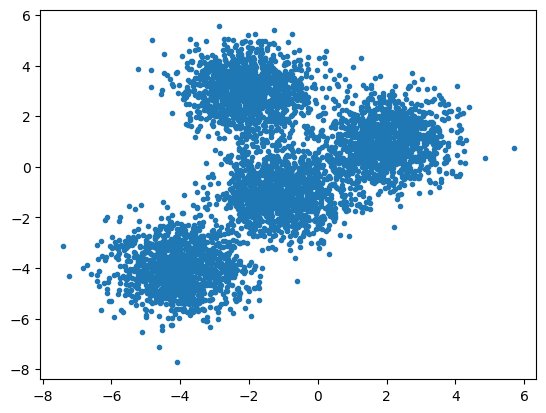

In [6]:
plt.scatter(x[:,0],x[:,1],marker='.')

In [10]:
k_means=KMeans(init='k-means++',n_clusters=4,n_init=12)
k_means

KMeans(n_clusters=4, n_init=12)

In [11]:
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [13]:
k_means_labels=k_means.labels_
k_means_labels

array([0, 3, 2, ..., 2, 3, 1], dtype=int32)

In [14]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[-4.00782475, -4.01734578],
       [-2.03869557,  3.01220553],
       [-1.05279066, -1.04435531],
       [ 1.97384072,  1.02188955]])

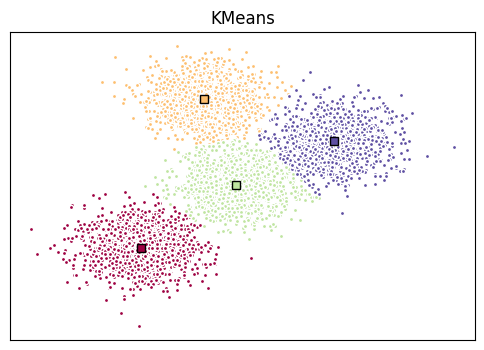

In [25]:
#Creating a visual plot
#initialising the figure size
fig=plt.figure(figsize=(6,4))
colors=plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
ax=fig.add_subplot(1,1,1)
for k,col in zip(range(len([[-4,-4],[2,1],[-2,3],[-1,-1]])),colors):
    my_members=(k_means_labels==k)
    cluster_center=k_means_cluster_centers[k]
    ax.plot(x[my_members,0],x[my_members,1],'w',markerfacecolor=col,marker='.')
    ax.plot(cluster_center[0],cluster_center[1],'s',markerfacecolor=col,markeredgecolor='k',markersize=6)
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.show()

**Assignment**

In [26]:
k_means=KMeans(init="k-means++",n_clusters=3,n_init=12)
k_means

KMeans(n_clusters=3, n_init=12)

In [27]:
k_means.fit(x)

KMeans(n_clusters=3, n_init=12)

In [30]:
k_mean_labels=k_means.labels_
k_mean_labels

array([1, 0, 0, ..., 2, 0, 2], dtype=int32)

In [33]:
k_mean_cluster_centers=k_means.cluster_centers_
k_mean_cluster_centers

array([[ 0.78595834,  0.16867886],
       [-3.6840825 , -3.66807575],
       [-2.03735121,  2.90933819]])

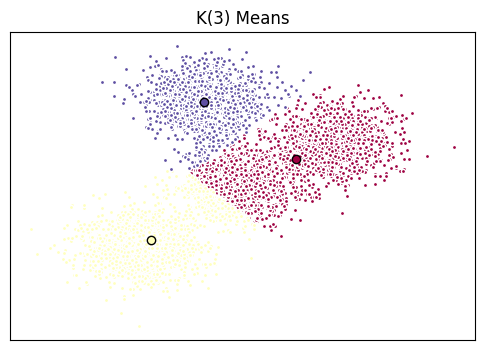

In [36]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
colors=plt.cm.Spectral(np.linspace(0,1,len(set(k_mean_labels))))
for k,col in zip(range(len([[-4,-4],[-1,-1],[-2,3]])),colors):
    my_members=(k_mean_labels==k)
    cluster_centers=k_mean_cluster_centers[k]
    ax.plot(x[my_members,0],x[my_members,1],'w',markerfacecolor=col,marker='.')
    ax.plot(cluster_centers[0],cluster_centers[1],'o',markerfacecolor=col,markersize=6,markeredgecolor='k')
ax.set_title("K(3) Means")
ax.set_xticks(())
ax.set_yticks(())
plt.show()

**Model-2**

In [40]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [41]:
df.drop('Address',axis=1,inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [43]:
from sklearn.preprocessing import StandardScaler
x=df.values[:,1:]
x=np.nan_to_num(x)
clus_df=StandardScaler().fit_transform(x)
clus_df

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [44]:
k_means=KMeans(init="k-means++",n_clusters=3,n_init=12)
k_means.fit(x)
labels=k_means.labels_
labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

In [45]:
df['clus_km']=labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [47]:
df.groupby('clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


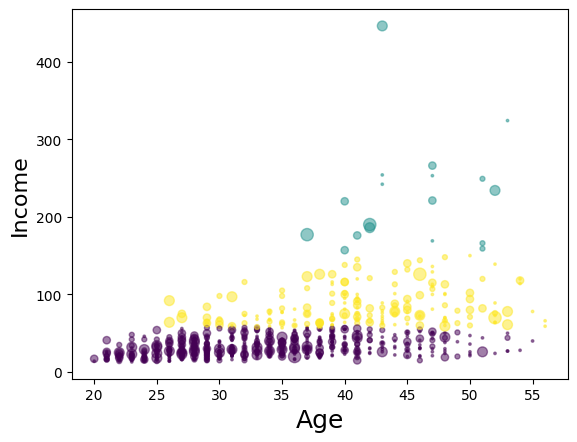

In [53]:
area=np.pi*(x[:,1])**2
plt.scatter(x[:,0],x[:,3],s=area,c=labels.astype(np.float64),alpha=0.5)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Income',fontsize=16)
plt.show()

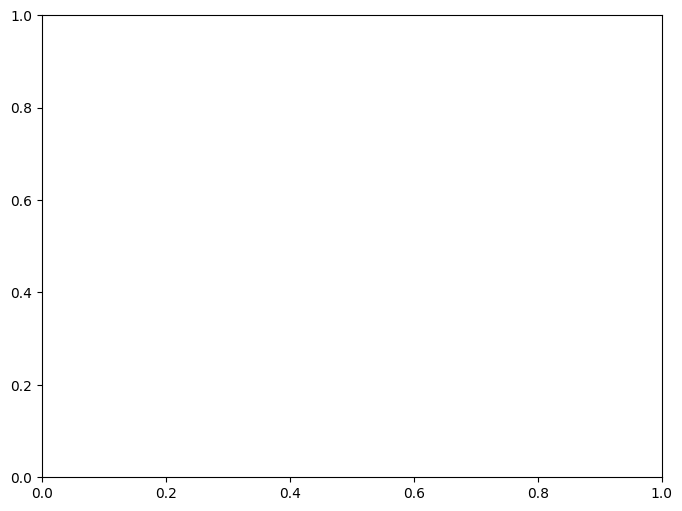

In [66]:

from mpl_toolkits import mplot3d
fig=plt.figure(1,figsize=(8,6))
plt.clf()
ax = mplot3d.Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(x[:, 1], x[:, 0], x[:, 3], c= labels.astype(np.float64))